## CSC 578 HW\#7 Intel Image Classification Competition (Fall 2023)

### Name: Vijayalakshmi Ramesh
### Course: CSC 578 Neural networks and Deep Learning
### Section: 710
### Date: 11/12/2023

### Importing necessary libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers 
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Ftrl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load the training data. Split into training 80% and validation 20%.

In [3]:
train_directory = '../input/csc-578-hw7-fall-2023/train'

img_height = 150
img_width = 150

train_dataset, valid_dataset = tf.keras.utils.image_dataset_from_directory(  # function from TensorFlow to create the training and validation datasets.
    train_directory,          # Path to the directory containing the training images.
    labels='inferred',        # use names of subdirectories as target labels
    label_mode='categorical', # convert target class (int) to one-hot-vector
    validation_split=0.2,     # Splitting 20% for validation
    subset="both",            # This parameter ensures that both the training and validation datasets are created.
    seed=123,                 # use same random seed with valid_set
    class_names=None,         # If provided, this can be a list of class names, but in this case, it's left as None to use the subdirectory names as class names.
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
)# /kaggle/input/csc-578-hw7-fall-2023/test_pred

Found 13986 files belonging to 6 classes.
Using 11189 files for training.
Using 2797 files for validation.


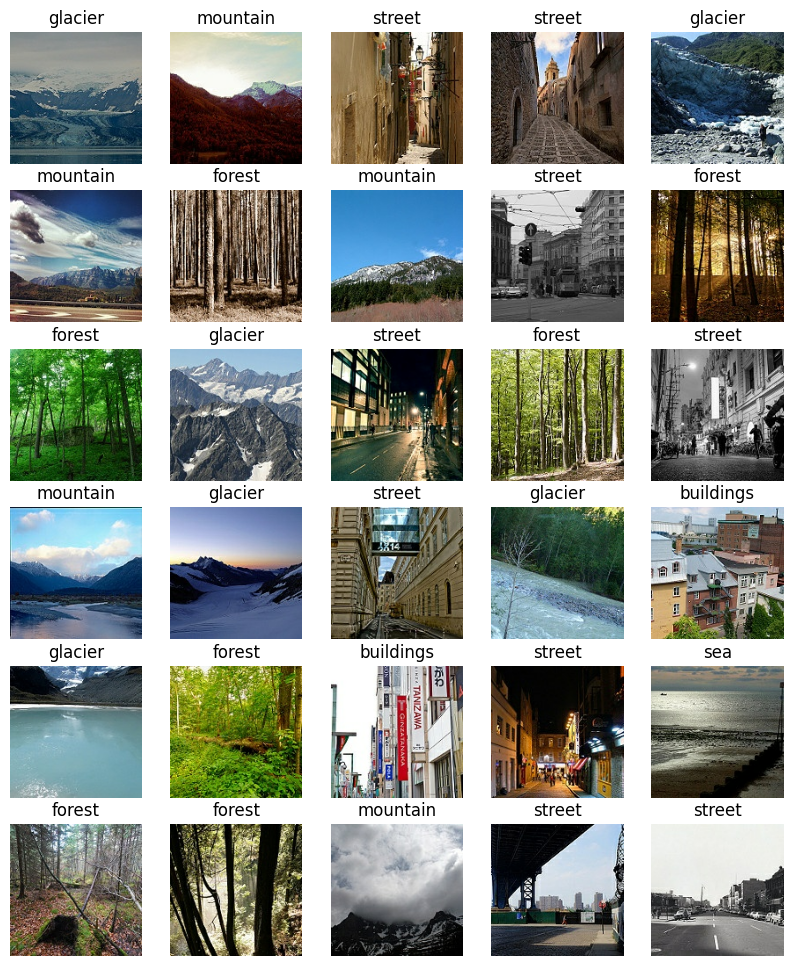

In [4]:
# Visualize some training examples.
plt.figure(figsize=(10, 12))
class_names = train_dataset.class_names
for images, labels in train_dataset.take(1):            # takes one batch of data from the training dataset
    for i in range(30):                                 # iterates over the images in the batch. It is set to visualize 30 images from the first batch.
        ax = plt.subplot(6, 5, i + 1)                   # 6 rows and 5 columns, and the current image is placed at position i + 1
        plt.imshow(images[i].numpy().astype("uint8"))   # This line uses Matplotlib to display the image. images[i] is a TensorFlow tensor representing the image. 
                                                        # images[i].numpy() converts it to a NumPy array, and .astype("uint8") ensures that the pixel values are 
                                                        # treated as unsigned 8-bit integers, which is the standard format for image display.
        plt.title(class_names[np.argmax(labels[i])])    # np.argmax(labels[i]) is used to find the index of the class with the highest probability in the one-hot encoded labels[i] array.
        plt.axis("off")

### Define a model.

# Best Model

In [5]:
# A relatively simple CNN model
model = keras.Sequential()
model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(32, (5,5), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(32, (7,7), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = SGD(learning_rate = 0.01)  # set learning rate 
model.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [6]:
# Print model summary to ensure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 70, 70, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        5

In [7]:
# Fit the model.
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
350/350 [==============================] - 35s 61ms/step - loss: 1.3801 - accuracy: 0.4419 - val_loss: 1.0776 - val_accuracy: 0.5685
Epoch 2/10
350/350 [==============================] - 10s 27ms/step - loss: 1.0665 - accuracy: 0.5814 - val_loss: 1.0756 - val_accuracy: 0.5724
Epoch 3/10
350/350 [==============================] - 8s 22ms/step - loss: 0.9729 - accuracy: 0.6173 - val_loss: 1.1208 - val_accuracy: 0.5560
Epoch 4/10
350/350 [==============================] - 9s 25ms/step - loss: 0.9169 - accuracy: 0.6472 - val_loss: 0.8826 - val_accuracy: 0.6789
Epoch 5/10
350/350 [==============================] - 8s 22ms/step - loss: 0.8523 - accuracy: 0.6741 - val_loss: 0.7963 - val_accuracy: 0.6975
Epoch 6/10
350/350 [==============================] - 8s 22ms/step - loss: 0.7937 - accuracy: 0.6995 - val_loss: 0.7797 - val_accuracy: 0.7022
Epoch 7/10
350/350 [==============================] - 8s 22ms/step - loss: 0.7441 - accuracy: 0.7172 - val_loss: 0.7447 - val_accuracy: 0.72

### Visualizing Training (Accuracy and loss)

In [8]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Examine the results for some validation examples.

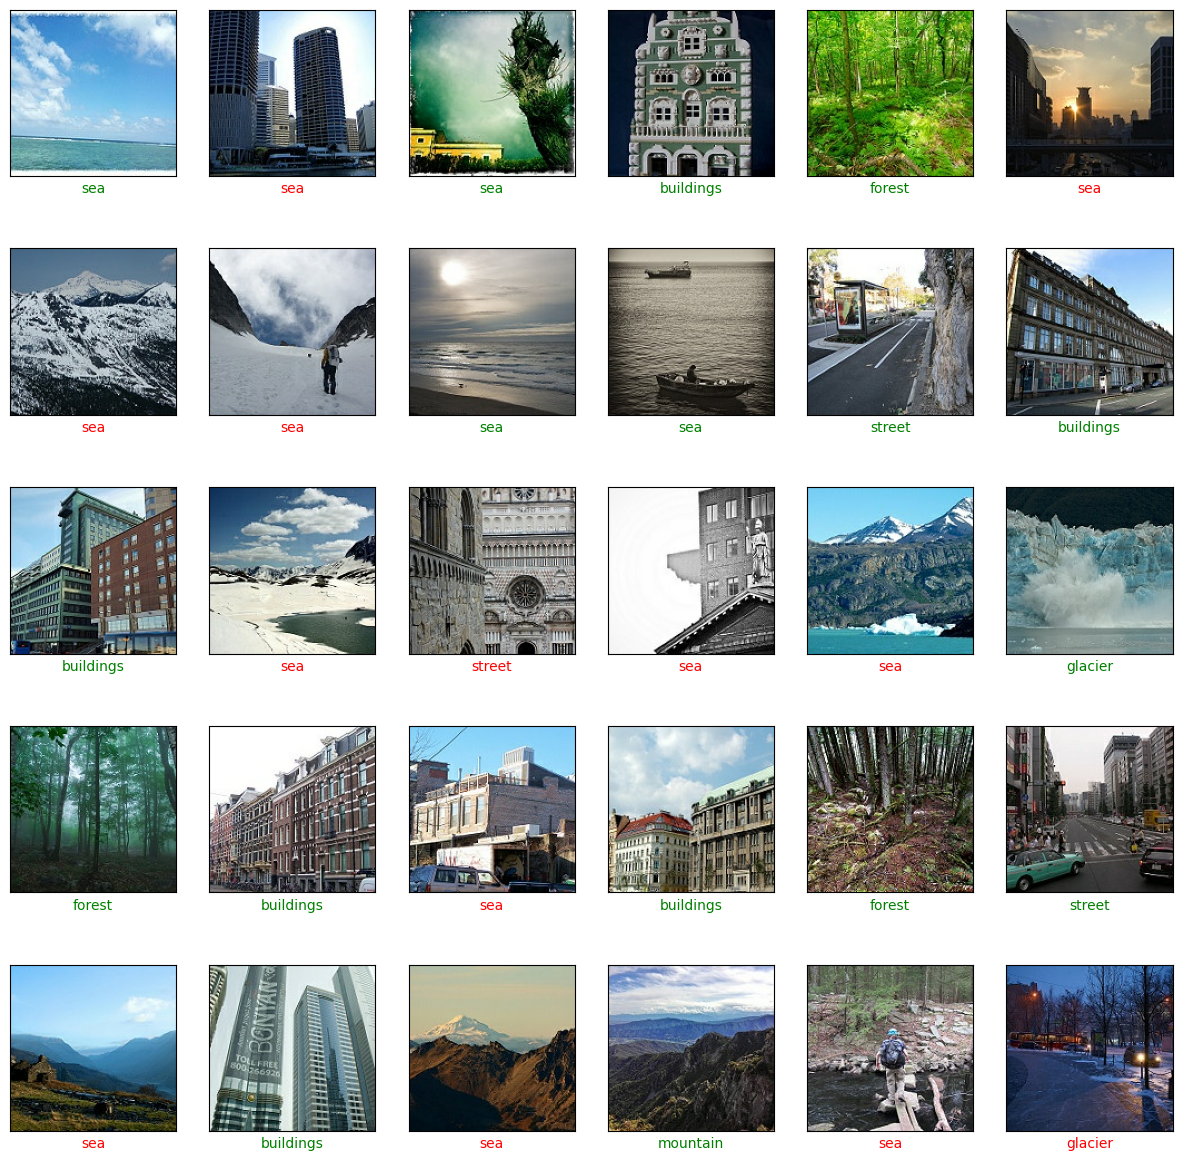

In [9]:
#Visualize 30 of the predicted data with green label for correct predictions
#and red label vise versa.
plt.figure(figsize=(15,15))
for images, labels in valid_dataset.take(1):
    for i in range(30):
        prediction = model.predict(images[i].numpy().reshape(1,img_height, img_width,3), verbose=0)
        plt.subplot(5, 6, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.grid(False)
        xlabel = plt.xlabel(class_names[prediction.argmax()])
        if (prediction.argmax() == labels[i].numpy().argmax()):
            xlabel.set_color("green")
        else:
            xlabel.set_color("red")
plt.show()

### Make Predictions for Test_Pred data.  
#### Note: Results are stored in a dictionary, which is keyed by file numbers (as integers).

In [10]:
# Load the test_pred data (which has no target labels)
import os
import cv2

pred_directory = '../input/csc-578-hw7-fall-2023/test_pred'
result_dict = {} # dictionary to store predictions (keyed by file number)

print ("predicting for testset...")
# iterate over files in that directory
for filename in os.listdir(pred_directory):
    f = os.path.join(pred_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        fnum = int(filename[:-4]) # filename e.g. '103.jpg" -> 103
        img = cv2.imread(f)
        ### 11/3/2023 update -- NO further image normalization is necessary for the test data.
        ### img = img/255.0
        img = img.reshape(-1,img_height, img_width,3)
        pred = model.predict(img, verbose=0)
        result_dict[fnum] = pred[0]  # [0] because there is only one data
        
print (f'  -- done, {len(result_dict)} test instances predicted.')

predicting for testset...
  -- done, 2993 test instances predicted.


## Writing the submission file, where the entries are sorted by the file number.

In [11]:
import csv

# Assuming you have a list of class names
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Save predictions to a CSV file with class names
output_file_path = 'predictions.csv'

# Sort result_dict by fnum in ascending order
sorted_result_dict = dict(sorted(result_dict.items()))

with open(output_file_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    
    # Write header
    header = ['fnum'] + class_names
    writer.writerow(header)
    
    # Write data
    for fnum, prediction in sorted_result_dict.items():
        row = [fnum] + list(prediction)
        writer.writerow(row)

print(f'Validation predictions saved to {output_file_path}.')


Validation predictions saved to predictions.csv.


-------------------------------------------------------------------------------

# Model 1 : Initial model

### Model Architecture

In [12]:
model1 = keras.Sequential()
model1.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model1.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model1.add(keras.layers.MaxPooling2D(2,2))
model1.add(keras.layers.Conv2D(32, (5,5), activation = 'relu'))
model1.add(keras.layers.MaxPooling2D(2,2))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.01)  # set learning rate 
model1.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
# Print model summary to ensure
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 70, 70, 32)        12832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 39200)            

### Fitting model

In [14]:
# Fit the model.
history = model1.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
350/350 [==============================] - 10s 21ms/step - loss: 1.9736 - accuracy: 0.1754 - val_loss: 1.7915 - val_accuracy: 0.1748
Epoch 2/10
350/350 [==============================] - 7s 20ms/step - loss: 1.7920 - accuracy: 0.1781 - val_loss: 1.7917 - val_accuracy: 0.1748
Epoch 3/10
350/350 [==============================] - 6s 17ms/step - loss: 1.7923 - accuracy: 0.1759 - val_loss: 1.7916 - val_accuracy: 0.1748
Epoch 4/10
350/350 [==============================] - 6s 18ms/step - loss: 1.7920 - accuracy: 0.1762 - val_loss: 1.7915 - val_accuracy: 0.1748
Epoch 5/10
350/350 [==============================] - 6s 18ms/step - loss: 1.7922 - accuracy: 0.1749 - val_loss: 1.7916 - val_accuracy: 0.1748
Epoch 6/10
350/350 [==============================] - 7s 18ms/step - loss: 1.7920 - accuracy: 0.1761 - val_loss: 1.7916 - val_accuracy: 0.1748
Epoch 7/10
350/350 [==============================] - 6s 17ms/step - loss: 1.7921 - accuracy: 0.1777 - val_loss: 1.7916 - val_accuracy: 0.174

### Training accuracy and loss

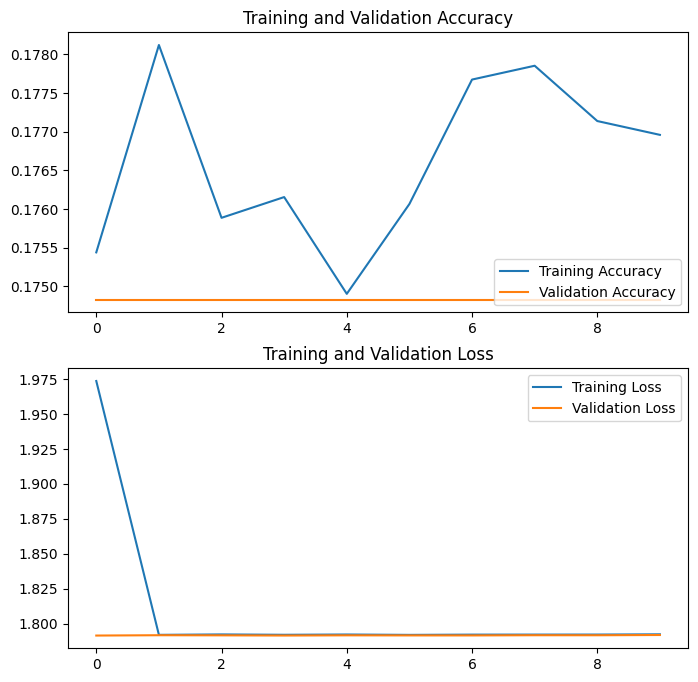

In [15]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

-----------------------------------------------------------------------------

# Model 2: Adjusting no. of filters

### Model Architecture

In [16]:
model2 = keras.Sequential()
model2.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model2.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model2.add(keras.layers.MaxPooling2D(2,2))
model2.add(keras.layers.Conv2D(32, (5,5), activation = 'relu'))
model2.add(keras.layers.MaxPooling2D(2,2))
model2.add(keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model2.add(keras.layers.MaxPooling2D(2,2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.01)  # set learning rate 
model2.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [17]:
# Print model summary to ensure
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 70, 70, 32)        12832     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 31, 31, 64)       

### Fitting the model

In [18]:
# Fit the model.
history = model2.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
350/350 [==============================] - 10s 22ms/step - loss: 2.0354 - accuracy: 0.1733 - val_loss: 1.7916 - val_accuracy: 0.1748
Epoch 2/10
350/350 [==============================] - 7s 19ms/step - loss: 1.7923 - accuracy: 0.1776 - val_loss: 1.7915 - val_accuracy: 0.1748
Epoch 3/10
350/350 [==============================] - 6s 18ms/step - loss: 1.7921 - accuracy: 0.1741 - val_loss: 1.7917 - val_accuracy: 0.1748
Epoch 4/10
350/350 [==============================] - 7s 19ms/step - loss: 1.7921 - accuracy: 0.1776 - val_loss: 1.7919 - val_accuracy: 0.1748
Epoch 5/10
350/350 [==============================] - 8s 23ms/step - loss: 1.7921 - accuracy: 0.1756 - val_loss: 1.7919 - val_accuracy: 0.1748
Epoch 6/10
350/350 [==============================] - 7s 18ms/step - loss: 1.7921 - accuracy: 0.1774 - val_loss: 1.7917 - val_accuracy: 0.1748
Epoch 7/10
350/350 [==============================] - 7s 19ms/step - loss: 1.7923 - accuracy: 0.1759 - val_loss: 1.7916 - val_accuracy: 0.174

### Training accuracy and loss

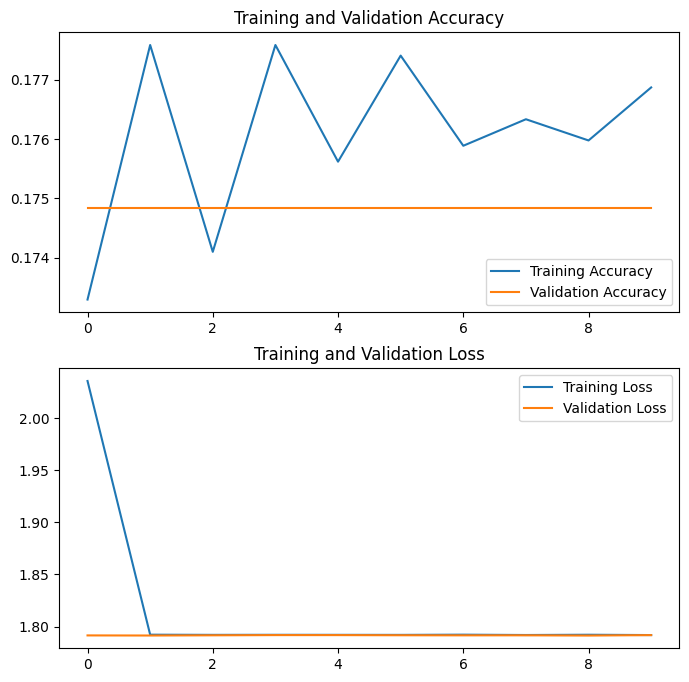

In [19]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 3: Adjusting size of filters

### Model Architecture

In [20]:
model3 = keras.Sequential()
model3.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model3.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model3.add(keras.layers.MaxPooling2D(2,2))
model3.add(keras.layers.Conv2D(16, (5,5), activation = 'relu'))
model3.add(keras.layers.MaxPooling2D(2,2))
model3.add(keras.layers.Conv2D(16, (7,7), activation = 'relu'))
model3.add(keras.layers.MaxPooling2D(2,2))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(64, activation='relu'))
model3.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.01)  # set learning rate 
model3.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
# Print model summary to ensure
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 70, 70, 16)        6416      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 35, 35, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 16)       

### Fitting the model

In [22]:
# Fit the model.
history = model3.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
350/350 [==============================] - 9s 19ms/step - loss: 1.3109 - accuracy: 0.4601 - val_loss: 1.0633 - val_accuracy: 0.5531
Epoch 2/10
350/350 [==============================] - 7s 19ms/step - loss: 1.0659 - accuracy: 0.5569 - val_loss: 0.9744 - val_accuracy: 0.5931
Epoch 3/10
350/350 [==============================] - 6s 17ms/step - loss: 0.9940 - accuracy: 0.5795 - val_loss: 0.9683 - val_accuracy: 0.5856
Epoch 4/10
350/350 [==============================] - 7s 18ms/step - loss: 0.9470 - accuracy: 0.6113 - val_loss: 0.9381 - val_accuracy: 0.6257
Epoch 5/10
350/350 [==============================] - 6s 18ms/step - loss: 0.9210 - accuracy: 0.6269 - val_loss: 0.9394 - val_accuracy: 0.6343
Epoch 6/10
350/350 [==============================] - 6s 18ms/step - loss: 0.9093 - accuracy: 0.6325 - val_loss: 0.9154 - val_accuracy: 0.6321
Epoch 7/10
350/350 [==============================] - 7s 19ms/step - loss: 0.8964 - accuracy: 0.6352 - val_loss: 0.9450 - val_accuracy: 0.6157

### Training Accuracy and loss

In [23]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 4: Adding more convolutional layers

### Model Architecure

In [24]:
model4 = keras.Sequential()
model4.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model4.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model4.add(keras.layers.Conv2D(16, (5,5), activation = 'relu'))
model4.add(keras.layers.MaxPooling2D(2,2))
model4.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model4.add(keras.layers.Conv2D(32, (5,5), activation = 'relu'))
model4.add(keras.layers.MaxPooling2D(2,2))
model4.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model4.add(keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model4.add(keras.layers.MaxPooling2D(2,2))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(64, activation='relu'))
model4.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = SGD(learning_rate = 0.01)  # set learning rate 
model4.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [25]:
# Print model summary to ensure
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 conv2d_12 (Conv2D)          (None, 144, 144, 16)      6416      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 72, 72, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 70, 70, 32)        4640      
                                                                 
 conv2d_14 (Conv2D)          (None, 66, 66, 32)        25632     
                                                      

### Fitting the model

In [26]:
# Fit the model.
history = model4.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
350/350 [==============================] - 16s 37ms/step - loss: 1.5377 - accuracy: 0.3785 - val_loss: 1.1494 - val_accuracy: 0.5509
Epoch 2/10
350/350 [==============================] - 12s 34ms/step - loss: 1.1209 - accuracy: 0.5588 - val_loss: 1.0587 - val_accuracy: 0.5735
Epoch 3/10
350/350 [==============================] - 12s 33ms/step - loss: 0.9901 - accuracy: 0.6059 - val_loss: 0.9942 - val_accuracy: 0.5992
Epoch 4/10
350/350 [==============================] - 14s 39ms/step - loss: 0.9157 - accuracy: 0.6312 - val_loss: 0.8907 - val_accuracy: 0.6421
Epoch 5/10
350/350 [==============================] - 12s 33ms/step - loss: 0.8595 - accuracy: 0.6653 - val_loss: 0.8065 - val_accuracy: 0.6922
Epoch 6/10
350/350 [==============================] - 12s 33ms/step - loss: 0.7980 - accuracy: 0.6895 - val_loss: 1.0553 - val_accuracy: 0.6092
Epoch 7/10
350/350 [==============================] - 12s 33ms/step - loss: 0.7444 - accuracy: 0.7096 - val_loss: 0.7719 - val_accuracy:

### Training accuracy and loss

In [27]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 5: Adjusting number and size of fully connected layers

### Model Architecture

In [28]:
# A relatively simple CNN model
model5 = keras.Sequential()
model5.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model5.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model5.add(keras.layers.MaxPooling2D(2,2))
model5.add(keras.layers.Conv2D(32, (5,5), activation = 'relu'))
model5.add(keras.layers.MaxPooling2D(2,2))
model5.add(keras.layers.Conv2D(32, (7,7), activation = 'relu'))
model5.add(keras.layers.MaxPooling2D(2,2))
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(128, activation='relu'))
model5.add(keras.layers.Dense(64, activation='relu'))
model5.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = SGD(learning_rate = 0.01)  # set learning rate 
model5.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [29]:
# Print model summary to ensure
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 70, 70, 32)        12832     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 32)       

### Fitting the model

In [30]:
# Fit the model.
history = model5.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
350/350 [==============================] - 8s 19ms/step - loss: 1.4786 - accuracy: 0.4004 - val_loss: 1.3367 - val_accuracy: 0.4501
Epoch 2/10
350/350 [==============================] - 7s 18ms/step - loss: 1.1141 - accuracy: 0.5589 - val_loss: 1.0778 - val_accuracy: 0.5620
Epoch 3/10
350/350 [==============================] - 7s 19ms/step - loss: 1.0214 - accuracy: 0.5920 - val_loss: 0.9410 - val_accuracy: 0.6439
Epoch 4/10
350/350 [==============================] - 9s 24ms/step - loss: 0.9608 - accuracy: 0.6218 - val_loss: 1.0057 - val_accuracy: 0.6071
Epoch 5/10
350/350 [==============================] - 7s 20ms/step - loss: 0.9123 - accuracy: 0.6440 - val_loss: 1.0591 - val_accuracy: 0.5785
Epoch 6/10
350/350 [==============================] - 7s 19ms/step - loss: 0.8574 - accuracy: 0.6693 - val_loss: 0.8532 - val_accuracy: 0.6668
Epoch 7/10
350/350 [==============================] - 7s 19ms/step - loss: 0.8055 - accuracy: 0.6884 - val_loss: 0.9097 - val_accuracy: 0.6578

### Training accuracy and loss

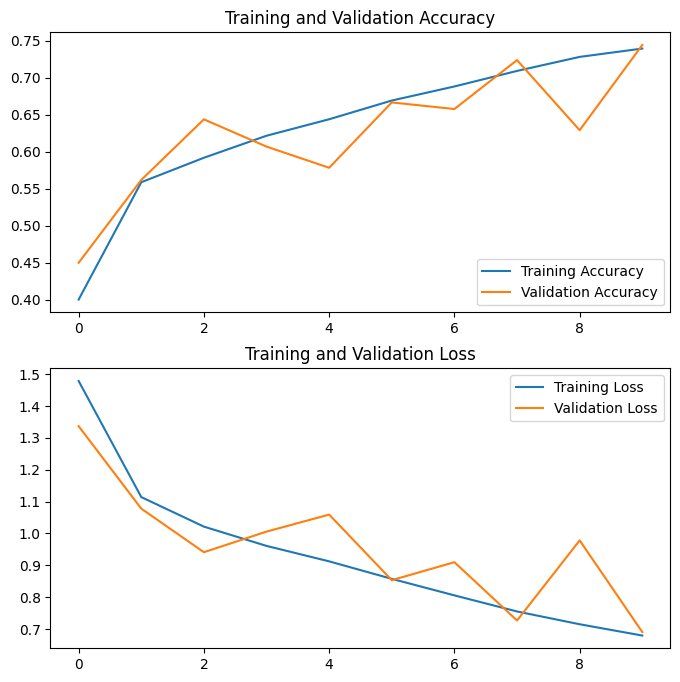

In [31]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 6: Adding droput layer in fully connected layers

### Model Architecture

In [32]:
# A relatively simple CNN model
model6 = keras.Sequential()
model6.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model6.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model6.add(keras.layers.MaxPooling2D(2,2))
model6.add(keras.layers.Conv2D(32, (5,5), activation = 'relu'))
model6.add(keras.layers.MaxPooling2D(2,2))
model6.add(keras.layers.Conv2D(32, (7,7), activation = 'relu'))
model6.add(keras.layers.MaxPooling2D(2,2))
model6.add(keras.layers.Flatten())
model6.add(keras.layers.Dense(64, activation='relu'))
model6.add(tf.keras.layers.Dropout(rate=0.3))
model6.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = SGD(learning_rate = 0.01)  # set learning rate 
model6.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [33]:
# Print model summary to ensure
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 70, 70, 32)        12832     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 29, 29, 32)       

### Fitting the model

In [34]:
# Fit the model.
history = model6.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
350/350 [==============================] - 8s 19ms/step - loss: 1.4167 - accuracy: 0.4181 - val_loss: 1.0954 - val_accuracy: 0.5717
Epoch 2/10
350/350 [==============================] - 7s 19ms/step - loss: 1.1162 - accuracy: 0.5606 - val_loss: 0.9751 - val_accuracy: 0.6307
Epoch 3/10
350/350 [==============================] - 8s 22ms/step - loss: 1.0263 - accuracy: 0.5983 - val_loss: 0.9439 - val_accuracy: 0.6532
Epoch 4/10
350/350 [==============================] - 7s 18ms/step - loss: 0.9670 - accuracy: 0.6287 - val_loss: 0.9657 - val_accuracy: 0.6185
Epoch 5/10
350/350 [==============================] - 7s 19ms/step - loss: 0.9096 - accuracy: 0.6490 - val_loss: 0.8262 - val_accuracy: 0.6872
Epoch 6/10
350/350 [==============================] - 7s 18ms/step - loss: 0.8648 - accuracy: 0.6678 - val_loss: 0.8745 - val_accuracy: 0.6571
Epoch 7/10
350/350 [==============================] - 7s 19ms/step - loss: 0.8197 - accuracy: 0.6917 - val_loss: 0.7828 - val_accuracy: 0.6986

### Training accuracy and loss

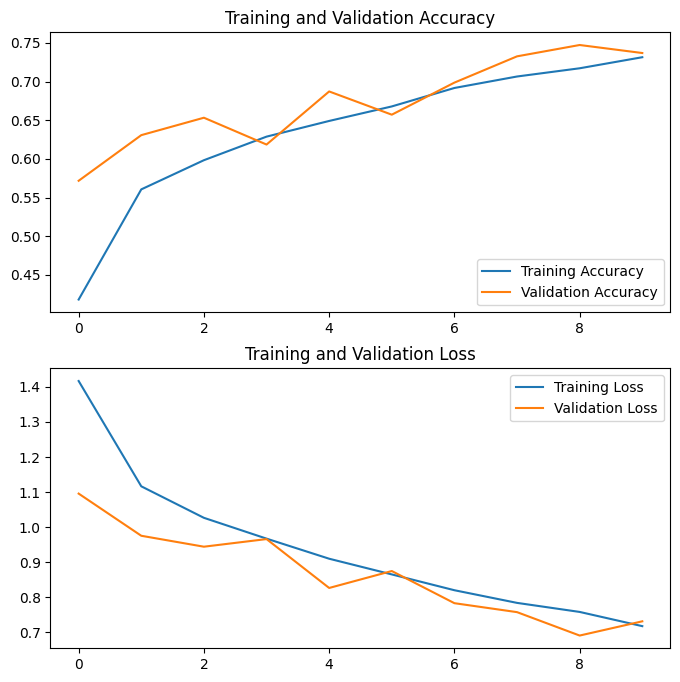

In [35]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 7: Adding dropout layer in convolutional layers

### Model Architecture

In [36]:
# A relatively simple CNN model
model7 = keras.Sequential()
model7.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model7.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model7.add(keras.layers.MaxPooling2D(2,2))
model7.add(keras.layers.Conv2D(32, (5,5), activation = 'relu'))
model7.add(tf.keras.layers.Dropout(rate=0.3))
model7.add(keras.layers.MaxPooling2D(2,2))
model7.add(keras.layers.Conv2D(32, (7,7), activation = 'relu'))
model7.add(keras.layers.MaxPooling2D(2,2))
model7.add(keras.layers.Flatten())
model7.add(keras.layers.Dense(64, activation='relu'))
model7.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = SGD(learning_rate = 0.01)  # set learning rate 
model7.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [37]:
# Print model summary to ensure
model7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 70, 70, 32)        12832     
                                                                 
 dropout_1 (Dropout)         (None, 70, 70, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                 

### Fitting the model

In [38]:
# Fit the model.
history = model7.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10


2023-11-13 03:56:57.304758: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


350/350 [==============================] - 9s 22ms/step - loss: 1.3226 - accuracy: 0.4712 - val_loss: 1.1003 - val_accuracy: 0.5964
Epoch 2/10
350/350 [==============================] - 8s 22ms/step - loss: 1.0554 - accuracy: 0.5865 - val_loss: 0.9881 - val_accuracy: 0.6346
Epoch 3/10
350/350 [==============================] - 8s 22ms/step - loss: 0.9615 - accuracy: 0.6311 - val_loss: 0.9200 - val_accuracy: 0.6668
Epoch 4/10
350/350 [==============================] - 8s 22ms/step - loss: 0.8888 - accuracy: 0.6593 - val_loss: 0.8351 - val_accuracy: 0.6847
Epoch 5/10
350/350 [==============================] - 8s 22ms/step - loss: 0.8190 - accuracy: 0.6940 - val_loss: 0.7714 - val_accuracy: 0.7201
Epoch 6/10
350/350 [==============================] - 8s 22ms/step - loss: 0.7574 - accuracy: 0.7139 - val_loss: 0.7486 - val_accuracy: 0.7437
Epoch 7/10
350/350 [==============================] - 7s 21ms/step - loss: 0.7035 - accuracy: 0.7386 - val_loss: 0.7997 - val_accuracy: 0.6950
Epoch 8/10

### Training Accuracy and Loss

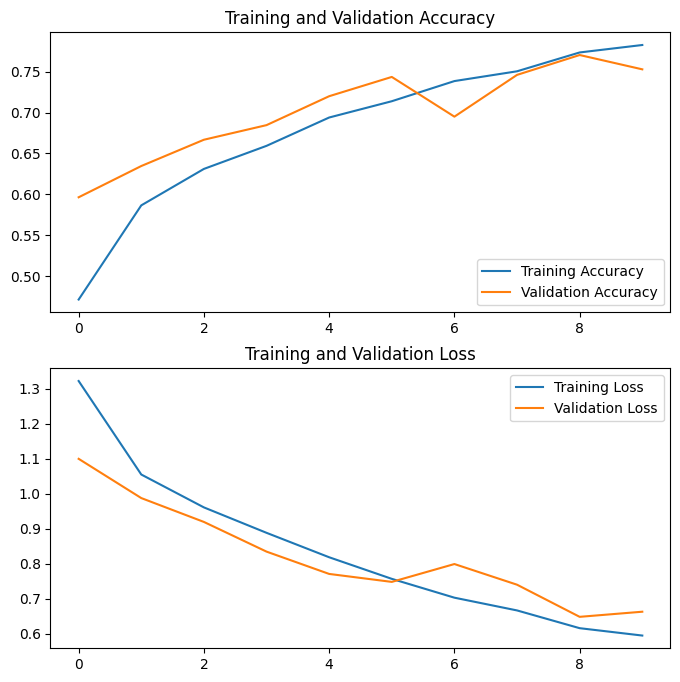

In [39]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 8: Adding L1 Regularizer in fully connected layer

### Model Architecture

In [40]:
# A relatively simple CNN model
model8 = keras.Sequential()
model8.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model8.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model8.add(keras.layers.MaxPooling2D(2,2))
model8.add(keras.layers.Conv2D(32, (5,5), activation = 'relu'))
model8.add(keras.layers.MaxPooling2D(2,2))
model8.add(keras.layers.Conv2D(32, (7,7), activation = 'relu'))
model8.add(keras.layers.MaxPooling2D(2,2))
model8.add(keras.layers.Flatten())
model8.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model8.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = SGD(learning_rate = 0.01)  # set learning rate 
model8.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [41]:
# Print model summary to ensure
model8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 70, 70, 32)        12832     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 29, 32)       

### Fitting the model

In [42]:
# Fit the model.
history = model8.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
350/350 [==============================] - 8s 19ms/step - loss: 19.9756 - accuracy: 0.4044 - val_loss: 1.7219 - val_accuracy: 0.5009
Epoch 2/10
350/350 [==============================] - 7s 18ms/step - loss: 1.6476 - accuracy: 0.4916 - val_loss: 1.5864 - val_accuracy: 0.5134
Epoch 3/10
350/350 [==============================] - 6s 18ms/step - loss: 1.5314 - accuracy: 0.5286 - val_loss: 1.6752 - val_accuracy: 0.4898
Epoch 4/10
350/350 [==============================] - 9s 24ms/step - loss: 1.4830 - accuracy: 0.5358 - val_loss: 1.4978 - val_accuracy: 0.5274
Epoch 5/10
350/350 [==============================] - 7s 20ms/step - loss: 1.4574 - accuracy: 0.5485 - val_loss: 1.5086 - val_accuracy: 0.5266
Epoch 6/10
350/350 [==============================] - 6s 18ms/step - loss: 1.4381 - accuracy: 0.5528 - val_loss: 1.4427 - val_accuracy: 0.5463
Epoch 7/10
350/350 [==============================] - 7s 19ms/step - loss: 1.4154 - accuracy: 0.5641 - val_loss: 1.3609 - val_accuracy: 0.582

### Training Accuracy and Loss

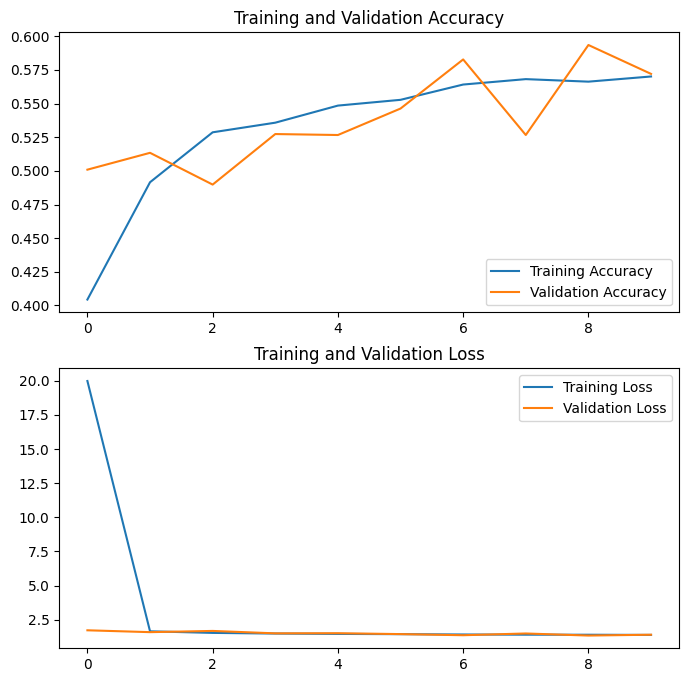

In [43]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 9: Adding L1 Regularizer in convolutional layers

### Model Architecture

In [44]:
# A relatively simple CNN model
model9 = keras.Sequential()
model9.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model9.add(keras.layers.Conv2D(16, (3,3), activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model9.add(keras.layers.MaxPooling2D(2,2))
model9.add(keras.layers.Conv2D(32, (5,5), activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model9.add(keras.layers.MaxPooling2D(2,2))
model9.add(keras.layers.Conv2D(32, (7,7), activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model9.add(keras.layers.MaxPooling2D(2,2))
model9.add(keras.layers.Flatten())
model9.add(keras.layers.Dense(64, activation='relu'))
model9.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = SGD(learning_rate = 0.01)  # set learning rate 
model9.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [45]:
# Print model summary to ensure
model9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 70, 70, 32)        12832     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 29, 29, 32)       

### Fitting the model

In [46]:
# Fit the model.
history = model9.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
350/350 [==============================] - 8s 19ms/step - loss: 9.1392 - accuracy: 0.4044 - val_loss: 3.3603 - val_accuracy: 0.4891
Epoch 2/10
350/350 [==============================] - 7s 19ms/step - loss: 2.0923 - accuracy: 0.5357 - val_loss: 1.5154 - val_accuracy: 0.5617
Epoch 3/10
350/350 [==============================] - 7s 20ms/step - loss: 1.4529 - accuracy: 0.5607 - val_loss: 1.3263 - val_accuracy: 0.6014
Epoch 4/10
350/350 [==============================] - 6s 18ms/step - loss: 1.3416 - accuracy: 0.5771 - val_loss: 1.2657 - val_accuracy: 0.5871
Epoch 5/10
350/350 [==============================] - 6s 18ms/step - loss: 1.2620 - accuracy: 0.5957 - val_loss: 1.4685 - val_accuracy: 0.4809
Epoch 6/10
350/350 [==============================] - 7s 19ms/step - loss: 1.2138 - accuracy: 0.5974 - val_loss: 1.1439 - val_accuracy: 0.6264
Epoch 7/10
350/350 [==============================] - 7s 19ms/step - loss: 1.1899 - accuracy: 0.6000 - val_loss: 1.1392 - val_accuracy: 0.6192

### Training Accuracy and Loss

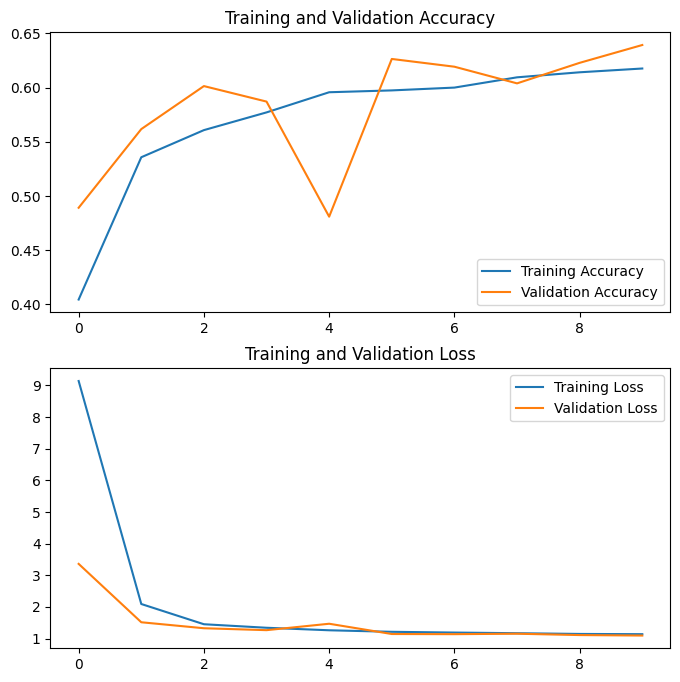

In [47]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 10: Adding L2 Regularizer in fully connected layer

### Model Architecture

In [48]:
# A relatively simple CNN model
model10 = keras.Sequential()
model10.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model10.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model10.add(keras.layers.MaxPooling2D(2,2))
model10.add(keras.layers.Conv2D(32, (5,5), activation = 'relu'))
model10.add(keras.layers.MaxPooling2D(2,2))
model10.add(keras.layers.Conv2D(32, (7,7), activation = 'relu'))
model10.add(keras.layers.MaxPooling2D(2,2))
model10.add(keras.layers.Flatten())
model10.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model10.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = SGD(learning_rate = 0.01)  # set learning rate 
model10.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [49]:
# Print model summary to ensure
model10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 150, 150, 3)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 70, 70, 32)        12832     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 29, 29, 32)      

### Fitting the model

In [50]:
# Fit the model.
history = model10.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
350/350 [==============================] - 8s 19ms/step - loss: 2.5708 - accuracy: 0.4576 - val_loss: 2.2227 - val_accuracy: 0.5645
Epoch 2/10
350/350 [==============================] - 7s 20ms/step - loss: 2.1145 - accuracy: 0.5746 - val_loss: 1.9529 - val_accuracy: 0.6117
Epoch 3/10
350/350 [==============================] - 6s 18ms/step - loss: 1.8933 - accuracy: 0.6121 - val_loss: 1.8997 - val_accuracy: 0.5649
Epoch 4/10
350/350 [==============================] - 7s 20ms/step - loss: 1.7107 - accuracy: 0.6476 - val_loss: 1.6527 - val_accuracy: 0.6450
Epoch 5/10
350/350 [==============================] - 11s 29ms/step - loss: 1.5551 - accuracy: 0.6758 - val_loss: 1.4339 - val_accuracy: 0.7033
Epoch 6/10
350/350 [==============================] - 7s 20ms/step - loss: 1.4123 - accuracy: 0.6980 - val_loss: 1.4065 - val_accuracy: 0.6693
Epoch 7/10
350/350 [==============================] - 7s 19ms/step - loss: 1.3031 - accuracy: 0.7091 - val_loss: 1.2544 - val_accuracy: 0.710

### Training Accuracy and Loss

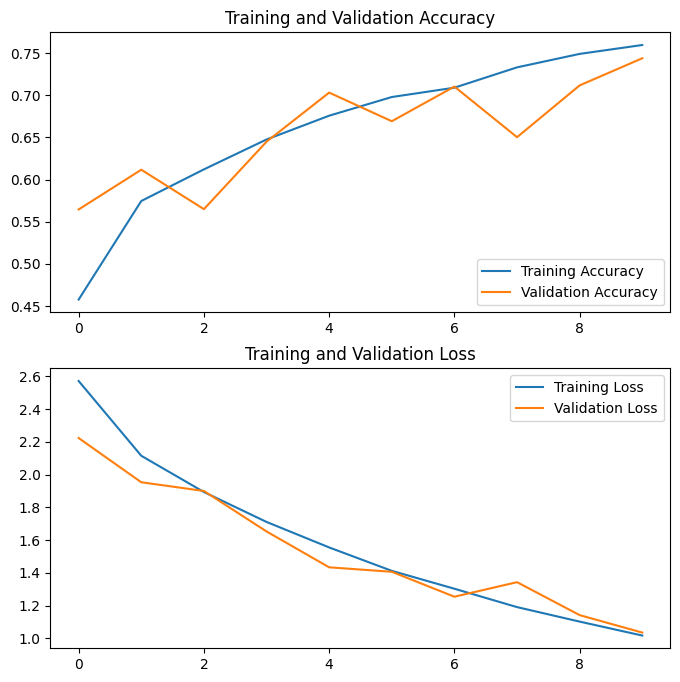

In [51]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 11: Adding L2 Regularizer in convolutional layers

### Model Architecture

In [52]:
# A relatively simple CNN model
model11 = keras.Sequential()
model11.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model11.add(keras.layers.Conv2D(16, (3,3), activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model11.add(keras.layers.MaxPooling2D(2,2))
model11.add(keras.layers.Conv2D(32, (5,5), activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model11.add(keras.layers.MaxPooling2D(2,2))
model11.add(keras.layers.Conv2D(32, (7,7), activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model11.add(keras.layers.MaxPooling2D(2,2))
model11.add(keras.layers.Flatten())
model11.add(keras.layers.Dense(64, activation='relu'))
model11.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = SGD(learning_rate = 0.01)  # set learning rate 
model11.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [53]:
# Print model summary to ensure
model11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 150, 150, 3)       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 70, 70, 32)        12832     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 29, 29, 32)      

### Fitting the model

In [54]:
# Fit the model.
history = model11.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
350/350 [==============================] - 8s 20ms/step - loss: 1.8631 - accuracy: 0.4845 - val_loss: 1.5618 - val_accuracy: 0.5939
Epoch 2/10
350/350 [==============================] - 7s 19ms/step - loss: 1.5547 - accuracy: 0.5822 - val_loss: 1.5092 - val_accuracy: 0.5753
Epoch 3/10
350/350 [==============================] - 7s 19ms/step - loss: 1.4258 - accuracy: 0.6156 - val_loss: 1.5345 - val_accuracy: 0.5685
Epoch 4/10
350/350 [==============================] - 7s 19ms/step - loss: 1.3190 - accuracy: 0.6424 - val_loss: 1.3292 - val_accuracy: 0.6271
Epoch 5/10
350/350 [==============================] - 7s 20ms/step - loss: 1.2380 - accuracy: 0.6552 - val_loss: 1.1603 - val_accuracy: 0.6811
Epoch 6/10
350/350 [==============================] - 7s 19ms/step - loss: 1.1748 - accuracy: 0.6727 - val_loss: 1.2190 - val_accuracy: 0.6443
Epoch 7/10
350/350 [==============================] - 7s 18ms/step - loss: 1.0998 - accuracy: 0.6946 - val_loss: 1.0680 - val_accuracy: 0.7111

### Training Accuracy and Loss

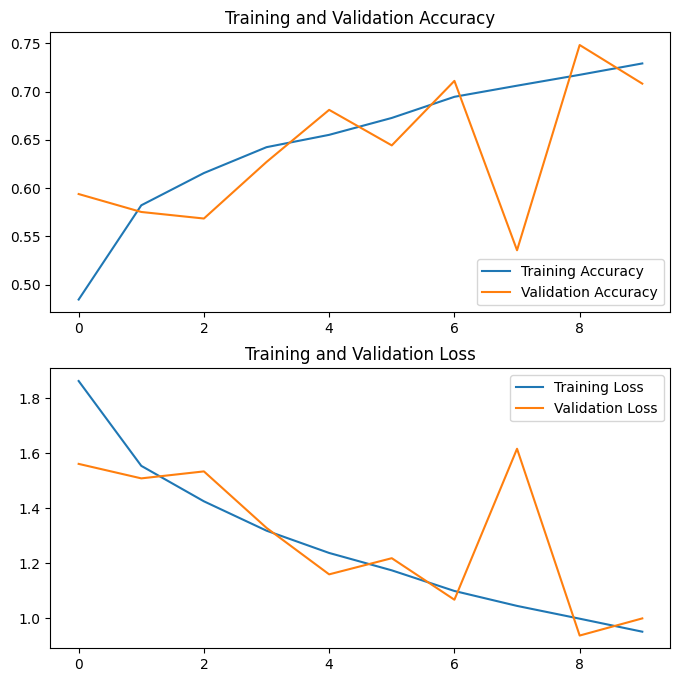

In [55]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 12: Adding Batch normalization

### Model Architecture

In [56]:
# A relatively simple CNN model
model12 = keras.Sequential()
model12.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model12.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model12.add(keras.layers.MaxPooling2D(2,2))
model12.add(keras.layers.Conv2D(32, (5,5), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model12.add(keras.layers.MaxPooling2D(2,2))
model12.add(keras.layers.Conv2D(32, (7,7), activation = 'relu'))
model12.add(keras.layers.MaxPooling2D(2,2))
model12.add(keras.layers.Flatten())
model12.add(keras.layers.Dense(64, activation='relu'))
model12.add(tf.keras.layers.BatchNormalization())
model12.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = SGD(learning_rate = 0.01)  # set learning rate 
model12.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [57]:
# Print model summary to ensure
model12.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 150, 150, 3)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 70, 70, 32)        12832     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 29, 29, 32)      

### Fitting the model

In [58]:
# Fit the model.
history = model12.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
350/350 [==============================] - 8s 20ms/step - loss: 1.0468 - accuracy: 0.6042 - val_loss: 1.0400 - val_accuracy: 0.5953
Epoch 2/10
350/350 [==============================] - 7s 19ms/step - loss: 0.8206 - accuracy: 0.6912 - val_loss: 1.2548 - val_accuracy: 0.5531
Epoch 3/10
350/350 [==============================] - 7s 20ms/step - loss: 0.7113 - accuracy: 0.7426 - val_loss: 1.0347 - val_accuracy: 0.5985
Epoch 4/10
350/350 [==============================] - 7s 20ms/step - loss: 0.6464 - accuracy: 0.7655 - val_loss: 1.5172 - val_accuracy: 0.4916
Epoch 5/10
350/350 [==============================] - 7s 19ms/step - loss: 0.5862 - accuracy: 0.7877 - val_loss: 0.9418 - val_accuracy: 0.6528
Epoch 6/10
350/350 [==============================] - 7s 19ms/step - loss: 0.5516 - accuracy: 0.7977 - val_loss: 0.9901 - val_accuracy: 0.6779
Epoch 7/10
350/350 [==============================] - 7s 19ms/step - loss: 0.5013 - accuracy: 0.8217 - val_loss: 1.2239 - val_accuracy: 0.5824

### Training loss and accuracy

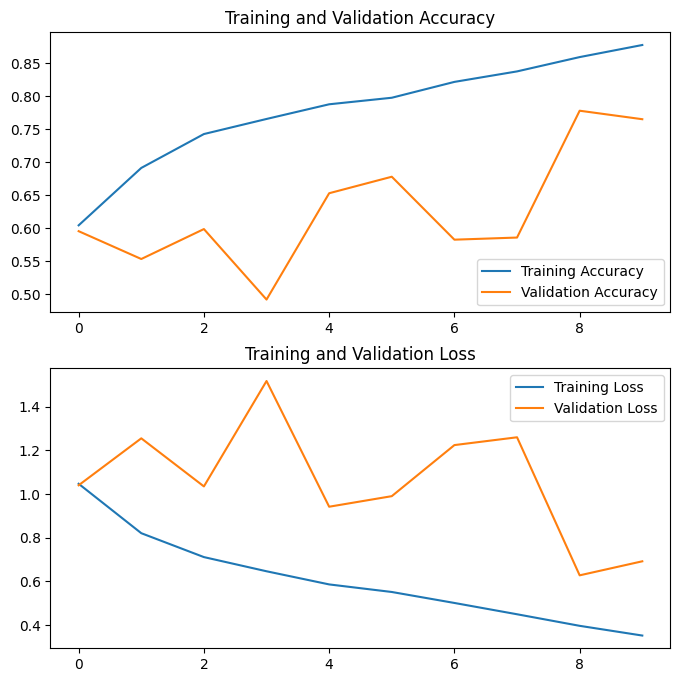

In [59]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 13: Reducing learning rate

### Model Architecture

In [60]:
# A relatively simple CNN model
model13 = keras.Sequential()
model13.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model13.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model13.add(keras.layers.MaxPooling2D(2,2))
model13.add(keras.layers.Conv2D(32, (5,5), activation = 'relu'))
model13.add(keras.layers.MaxPooling2D(2,2))
model13.add(keras.layers.Conv2D(32, (7,7), activation = 'relu'))
model13.add(keras.layers.MaxPooling2D(2,2))
model13.add(keras.layers.Flatten())
model13.add(keras.layers.Dense(64, activation='relu'))
model13.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = SGD(learning_rate = 0.001)  # set learning rate 
model13.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [61]:
# Print model summary to ensure
model13.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 150, 150, 3)       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 70, 70, 32)        12832     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 29, 29, 32)      

### Fitting the model

In [62]:
# Fit the model.
history = model13.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
350/350 [==============================] - 8s 20ms/step - loss: 1.7609 - accuracy: 0.2716 - val_loss: 1.7155 - val_accuracy: 0.3150
Epoch 2/10
350/350 [==============================] - 7s 19ms/step - loss: 1.5611 - accuracy: 0.4483 - val_loss: 1.3612 - val_accuracy: 0.5002
Epoch 3/10
350/350 [==============================] - 7s 20ms/step - loss: 1.2782 - accuracy: 0.5124 - val_loss: 1.1994 - val_accuracy: 0.5431
Epoch 4/10
350/350 [==============================] - 7s 19ms/step - loss: 1.1846 - accuracy: 0.5403 - val_loss: 1.1644 - val_accuracy: 0.5638
Epoch 5/10
350/350 [==============================] - 7s 19ms/step - loss: 1.1222 - accuracy: 0.5598 - val_loss: 1.1228 - val_accuracy: 0.5663
Epoch 6/10
350/350 [==============================] - 9s 26ms/step - loss: 1.0804 - accuracy: 0.5833 - val_loss: 1.0723 - val_accuracy: 0.5867
Epoch 7/10
350/350 [==============================] - 7s 19ms/step - loss: 1.0469 - accuracy: 0.5984 - val_loss: 1.0654 - val_accuracy: 0.6067

### Training Accuracy and loss

In [63]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 14: Using Data Augmentation

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Set the seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to apply data augmentation within the TensorFlow pipeline
def augment_images(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # Convert image to float32

    # Apply individual transformations
    image = tf.image.stateless_random_flip_left_right(image, seed=(seed, 0))
    image = tf.image.stateless_random_flip_up_down(image, seed=(seed, 1))
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

    image = tf.image.random_brightness(image, max_delta=0.5, seed=seed)
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8, seed=seed)

    image = tf.image.convert_image_dtype(image, tf.uint8)  # Convert back to uint8
    return image, label

# Apply data augmentation to the original training dataset
augmented_train_dataset = train_dataset.map(augment_images)

# Convert the augmented dataset images to float32 to match the original dataset
augmented_train_dataset = augmented_train_dataset.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), y))

# Concatenate the original and augmented datasets
combined_train_dataset = train_dataset.concatenate(augmented_train_dataset)

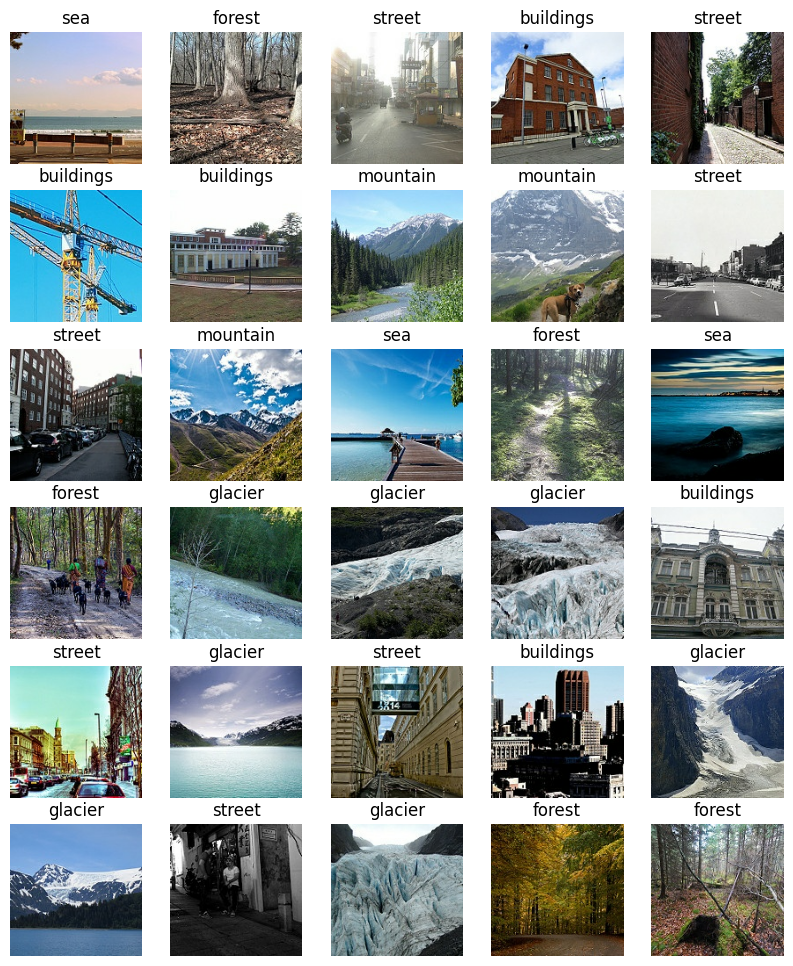

In [65]:
# Visualize some examples from the combined dataset
plt.figure(figsize=(10, 12))
for images, labels in combined_train_dataset.take(1):
    for i in range(30):
        ax = plt.subplot(6, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

plt.show()

In [10]:
# Fit the model.
history = model.fit(combined_train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
700/700 [==============================] - 21s 29ms/step - loss: 1.1961 - accuracy: 0.4748 - val_loss: 0.8999 - val_accuracy: 0.6793
Epoch 2/10
700/700 [==============================] - 21s 30ms/step - loss: 1.1785 - accuracy: 0.4815 - val_loss: 0.8181 - val_accuracy: 0.7004
Epoch 3/10
700/700 [==============================] - 21s 30ms/step - loss: 1.1651 - accuracy: 0.4896 - val_loss: 1.1327 - val_accuracy: 0.6103
Epoch 4/10
700/700 [==============================] - 21s 30ms/step - loss: 1.1472 - accuracy: 0.4941 - val_loss: 0.8875 - val_accuracy: 0.6968
Epoch 5/10
700/700 [==============================] - 21s 30ms/step - loss: 1.1336 - accuracy: 0.5015 - val_loss: 0.6520 - val_accuracy: 0.7744
Epoch 6/10
700/700 [==============================] - 21s 30ms/step - loss: 1.1193 - accuracy: 0.5058 - val_loss: 0.6205 - val_accuracy: 0.7790
Epoch 7/10
700/700 [==============================] - 21s 29ms/step - loss: 1.1040 - accuracy: 0.5120 - val_loss: 0.6654 - val_accuracy:

### Visualizing training accuracy and loss

In [68]:
acc = history.history['accuracy']           # extracts the training accuracy values for each epoch from the history object.
val_acc = history.history['val_accuracy']   # extracts the validation accuracy values for each epoch from the history object. 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()